# **OLA Business Case Study**

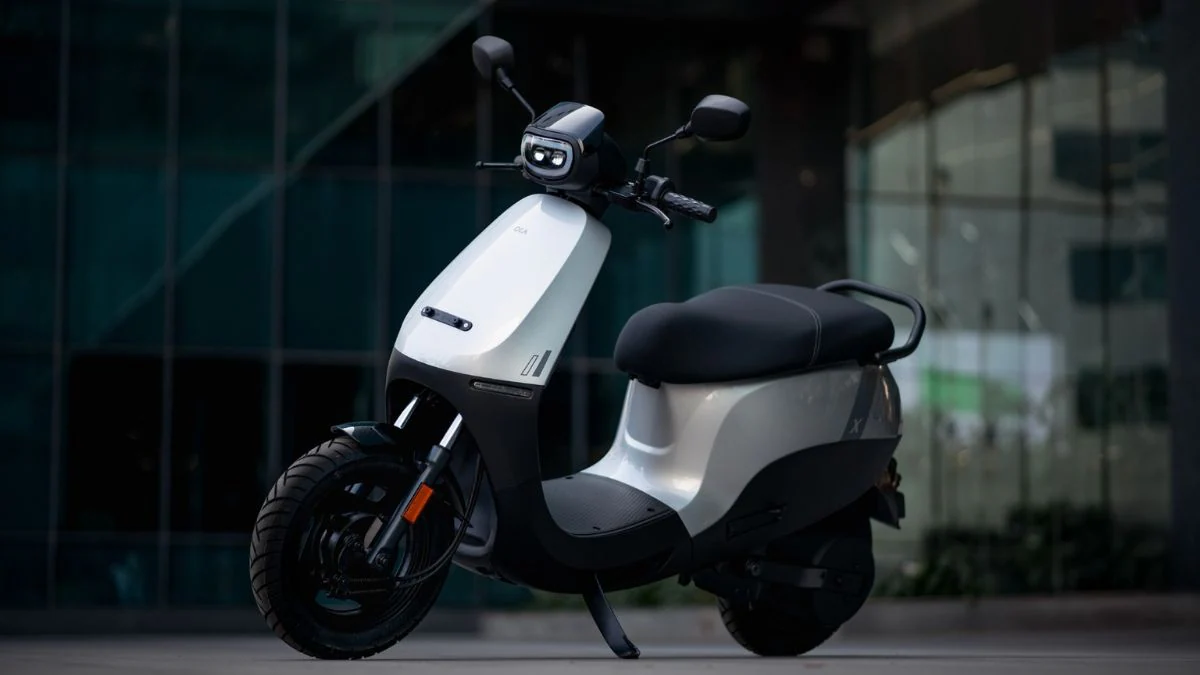

### **Executive Summary**

**Key Findings :**

1. This case study analyzed data from 2381 Ola drivers, revealing that 1565 drivers churned, while 765 remained active.
2. Major factors influencing driver churn are a significantly lower rate of promotions (average promotion rate for churned drivers was X% lower than retained drivers) and lower driver satisfaction (average satisfaction score of Y for churned drivers compared to Z for retained drivers).
3. The majority of driver attrition occurred during 2019 and 2020.
Overall, driver promotions are low across operational cities and are a significant driver of churn.
4. Drivers with fewer reported incidents/feedback/etc have higher churn rates."

**Recommendations :**
1. Implement a transparent and equitable driver promotion system.
2. Enhance driver satisfaction through improved feedback mechanisms.
3. Proactively encourage driver reporting and address underlying issues.
4. Conduct city-specific analyses to tailor driver retention strategies.
5. Develop a predictive model for early churn intervention.
6. Analyze the high churn rates of 2019-2020 to determine root causes.

# **INTRODUCTION**

**Ola, founded in December 2010 by Bhavish Aggarwal and Ankit Bhati, is India's largest ride-hailing platform, initially focusing on taxi aggregation and now offering a broader range of mobility solutions, including electric vehicles and food delivery**

 **Problem Statement:**

Ola is experiencing a significant rate of driver churn, leading to operational inefficiencies, reduced service availability, and potential revenue loss. The current inability to proactively identify and address the factors contributing to driver churn hinders the company's ability to maintain a stable driver workforce.

The underlying causes of this churn, such as fluctuating earnings, dissatisfaction with platform policies, or competition from other ride-sharing services, are not consistently identified. Therefore, the problem is to develop a predictive machine learning model that accurately identifies Ola drivers at high risk of churn, while also highlighting the key contributing factors.

This model will enable Ola to implement targeted interventions and proactive retention strategies, ultimately improving driver satisfaction and minimizing the negative impact on service reliability and business performance."

## **Objectives:**

**1. Develop a predictive model:** To accurately forecast Ola driver churn using relevant driver data.

**2. Identify key churn drivers:** To determine the most influential factors contributing to driver attrition.

**3. Evaluate model performance:** To assess the accuracy and reliability of the c. hurn prediction model using appropriate metrics.

**4. Enable proactive retention strategies:** To provide Ola with actionable insights for implementing targeted interventions to reduce churn.

**5. Provide actionable insights:** To deliver clear, data-driven recommendations that Ola can implement to improve driver retention.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer

## **Basic Data Explorations**

In [2]:
df =pd.read_csv('/content/ola_driver_scaler.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(19104, 13)

In [5]:
df.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


**Column Profiling :**

1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a 13. month (negative business indicates cancellation/refund or car EMI adjustments)
14. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)



In [6]:
df['Gender'].value_counts()

,count
Gender,
0.0,11074
1.0,7978


In [7]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'],format='mixed')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'],format='mixed')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'],format='mixed')

In [8]:
num_vars = df.select_dtypes(np.number)
num_vars.drop(['Driver_ID','Gender'], axis = 1, inplace = True)
num_vars.columns

Index(['Age', 'Education_Level', 'Income', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating'],
      dtype='object')

**Handling Null values by knn imputation**

In [9]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_vars)
data_new = imputer.transform(num_vars)
data_new = pd.DataFrame(data_new)
data_new.columns = num_vars.columns

In [10]:
data_new.isnull().sum()

,0
Age,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [11]:
resultant_columns = list(set(df.columns).difference(set(num_vars)))
resultant_columns

['Driver_ID', 'Gender', 'City', 'LastWorkingDate', 'Dateofjoining', 'MMM-YY']

In [12]:
new_df = pd.concat([data_new, df[resultant_columns]], axis=1)
new_df.head()

,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_ID,Gender,City,LastWorkingDate,Dateofjoining,MMM-YY
0,28.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,0.0,C23,NaT,2018-12-24,2019-01-01
1,28.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,0.0,C23,NaT,2018-12-24,2019-02-01
2,28.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,0.0,C23,2019-03-11,2018-12-24,2019-03-01
3,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,0.0,C7,NaT,2020-11-06,2020-11-01
4,31.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,0.0,C7,NaT,2020-11-06,2020-12-01


In [13]:
new_df['Gender'].value_counts()

,count
Gender,
0.0,11074
1.0,7978


**Aggregating the dataset on 'Driver ID' and creating target feature**

In [14]:
df_x = new_df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna().reset_index()
QR1 =  (new_df.groupby('Driver_ID').agg({'Quarterly Rating':'first','Income':'first'})[['Quarterly Rating','Income']]).reset_index()
QR2 =  (new_df.groupby('Driver_ID').agg({'Quarterly Rating':'last','Income':'last'})[['Quarterly Rating','Income']]).reset_index()
df_x = df_x.merge(QR1,on='Driver_ID')
df_x = df_x.merge(QR2,on='Driver_ID')
df_x.head()

,Driver_ID,LastWorkingDate,Quarterly Rating_x,Income_x,Quarterly Rating_y,Income_y
0,1,False,2.0,57387.0,2.0,57387.0
1,2,True,1.0,67016.0,1.0,67016.0
2,4,False,1.0,65603.0,1.0,65603.0
3,5,False,1.0,46368.0,1.0,46368.0
4,6,True,1.0,78728.0,2.0,78728.0


In [15]:
df_x['Rating_Change'] = np.select([df_x['Quarterly Rating_x'] < df_x['Quarterly Rating_y'],
                                 df_x['Quarterly Rating_x'] > df_x['Quarterly Rating_y'],df_x['Quarterly Rating_x'] == df_x['Quarterly Rating_y'],],['Increased', 'Decreased', 'Same'],
                                default='Unknown')
df_x['Promoted'] = np.where(df_x['Income_y'] <= df_x['Income_x'],0,1)
df_x['Income_Change'] = np.select([df_x['Income_y'] > df_x['Income_x'],df_x['Income_y'] == df_x['Income_x']],['Increased','Same'],default='Unknown')
df_x = df_x.drop(columns = ['LastWorkingDate','Quarterly Rating_x','Quarterly Rating_y','Income_x','Income_y'],axis=1)
df_x.head()

,Driver_ID,Rating_Change,Promoted,Income_Change
0,1,Same,0,Same
1,2,Same,0,Same
2,4,Same,0,Same
3,5,Same,0,Same
4,6,Increased,0,Same


In [16]:
df_x['Income_Change'].value_counts()

,count
Income_Change,
Same,2338
Increased,43


In [17]:
df_x['Promoted'].value_counts()

,count
Promoted,
0,2338
1,43


In [18]:
df1 = new_df.copy()
df1 = df1.groupby('Driver_ID').agg({'MMM-YY':'count','Age':'max','Gender':'last','City':'last','Education_Level':'last',
                                    'Income':'last','Dateofjoining':'first','LastWorkingDate':'last','Joining Designation':'last',
                                    'Grade':'last','Total Business Value':'sum','Quarterly Rating':'last'}).reset_index()
df1.rename(columns={'MMM-YY':'No_of_Reportings'},inplace=True)
df1['Employment_Status'] = np.where(df1['LastWorkingDate'].isnull(), 0, 1)
df1['Age'] = df1['Age'].round().astype('Int64')
df1.reset_index(drop=True,inplace=True)
df_new = df1.merge(df_x,on='Driver_ID')
df_new.head()

,Driver_ID,No_of_Reportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Employment_Status,Rating_Change,Promoted,Income_Change
0,1,3,28,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,1,Same,0,Same
1,2,2,31,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,Same,0,Same
2,4,5,43,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,1,Same,0,Same
3,5,3,29,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,1,Same,0,Same
4,6,5,31,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,0,Increased,0,Same


In [19]:
df_new[df_new.duplicated]

,Driver_ID,No_of_Reportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Employment_Status,Rating_Change,Promoted,Income_Change


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   No_of_Reportings      2381 non-null   int64         
 2   Age                   2381 non-null   Int64         
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   float64       
 6   Income                2381 non-null   float64       
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   float64       
 10  Grade                 2381 non-null   float64       
 11  Total Business Value  2381 non-null   float64       
 12  Quarterly Rating      2381 non-null   float64       
 13  Employment_Status 

In [21]:
df_new['Joining Designation'].value_counts()

,count
Joining Designation,
1.0,1026
2.0,815
3.0,493
4.0,36
5.0,11


## **Univariate Analyses**

In [22]:
df_new.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,NaN,NaN,NaN,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
No_of_Reportings,2381.0,NaN,NaN,NaN,8.02352,1.0,3.0,5.0,10.0,24.0,6.78359
Age,2381.0,<NA>,<NA>,<NA>,33.769845,21.0,30.0,33.0,37.0,58.0,5.933379
Gender,2381.0,NaN,NaN,NaN,0.410332,0.0,0.0,0.0,1.0,1.0,0.491997
City,2381,29,C20,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,2381.0,NaN,NaN,NaN,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,NaN,NaN,NaN,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Dateofjoining,2381,NaN,NaN,NaN,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,NaN,NaN,NaN,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,2381.0,NaN,NaN,NaN,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433


In [23]:
categorical = ['No_of_Reportings','Gender','City','Education_Level','Grade','Joining Designation','Employment_Status','Rating_Change','Income_Change','Promoted']
for i in categorical:
  print(f'\033[1m Value counts of {i} : \033[0m\n',df_new[i].value_counts().reset_index())

 Value counts of No_of_Reportings : 
     No_of_Reportings  count
0                  5    309
1                  3    263
2                  4    245
3                 24    229
4                  2    203
5                  6    197
6                  1    181
7                  7    136
8                  9    109
9                  8    103
10                10     56
11                11     55
12                13     50
13                14     49
14                12     43
15                18     31
16                15     25
17                17     24
18                19     20
19                16     18
20                20     15
21                23      8
22                22      6
23                21      6
 Value counts of Gender : 
    Gender  count
0     0.0   1404
1     1.0    977
 Value counts of City : 
    City  count
0   C20    152
1   C15    101
2   C29     96
3   C26     93
4   C27     89
5    C8     89
6   C10     86
7   C16     84
8    C3     82
9   C22

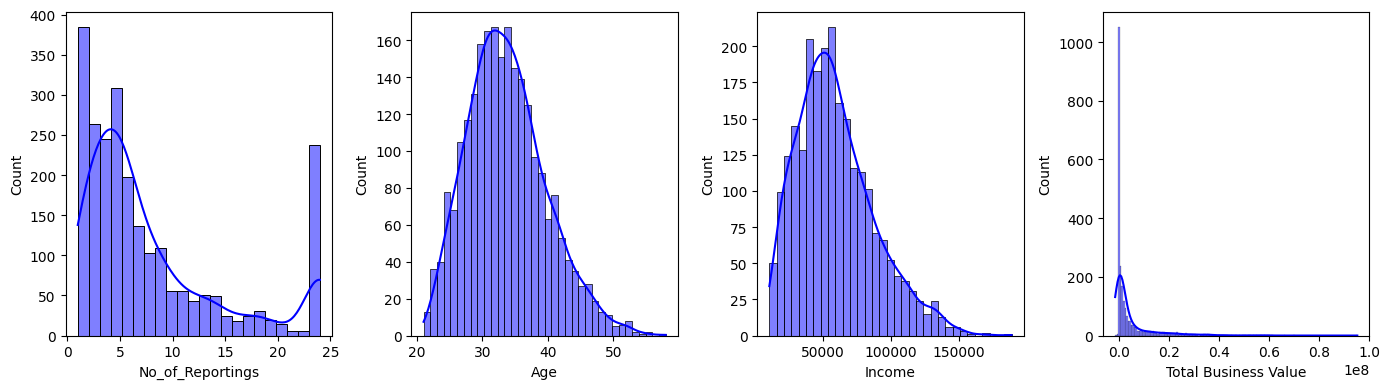

In [24]:
numeric = ['No_of_Reportings','Age','Income','Total Business Value']
fig, axes = plt.subplots(1,4,figsize=(14,4))
for i,ax in enumerate(axes.flatten()):
  sns.histplot(data=df_new,x=numeric[i],ax=ax,kde=True,color='blue')
  plt.tight_layout()
plt.show()

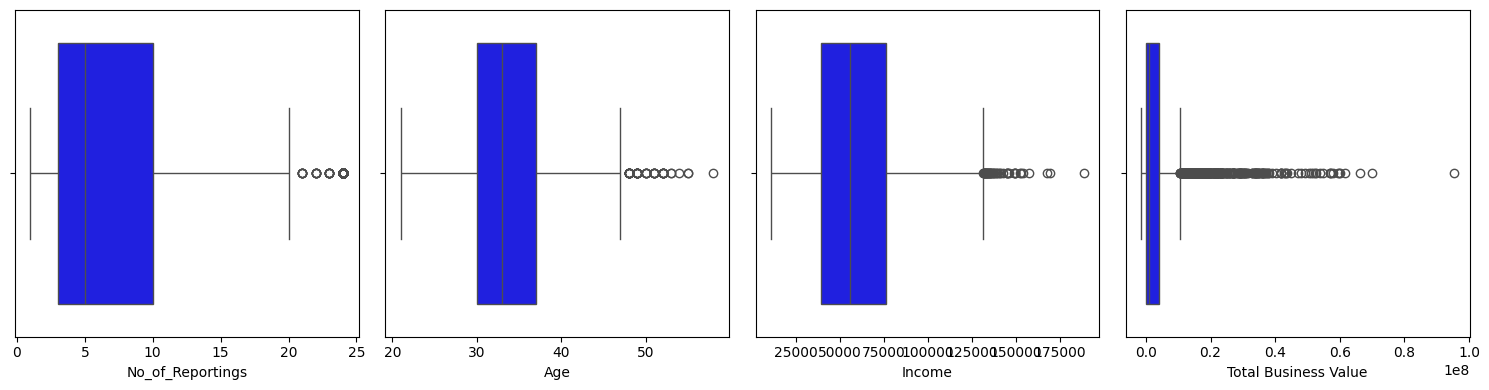

In [25]:
numeric = ['No_of_Reportings','Age','Income','Total Business Value']
fig, axes = plt.subplots(1,4,figsize=(15,4))
for i,ax in enumerate(axes.flatten()):
  sns.boxplot(data=df_new,x=numeric[i],ax=ax,color='blue')
  plt.tight_layout()
plt.show()

In [26]:
df_new.groupby('Joining Designation')['Employment_Status'].value_counts().reset_index()

,Joining Designation,Employment_Status,count
0,1.0,1,752
1,1.0,0,274
2,2.0,1,560
3,2.0,0,255
4,3.0,1,274
5,3.0,0,219
6,4.0,1,22
7,4.0,0,14
8,5.0,1,8
9,5.0,0,3


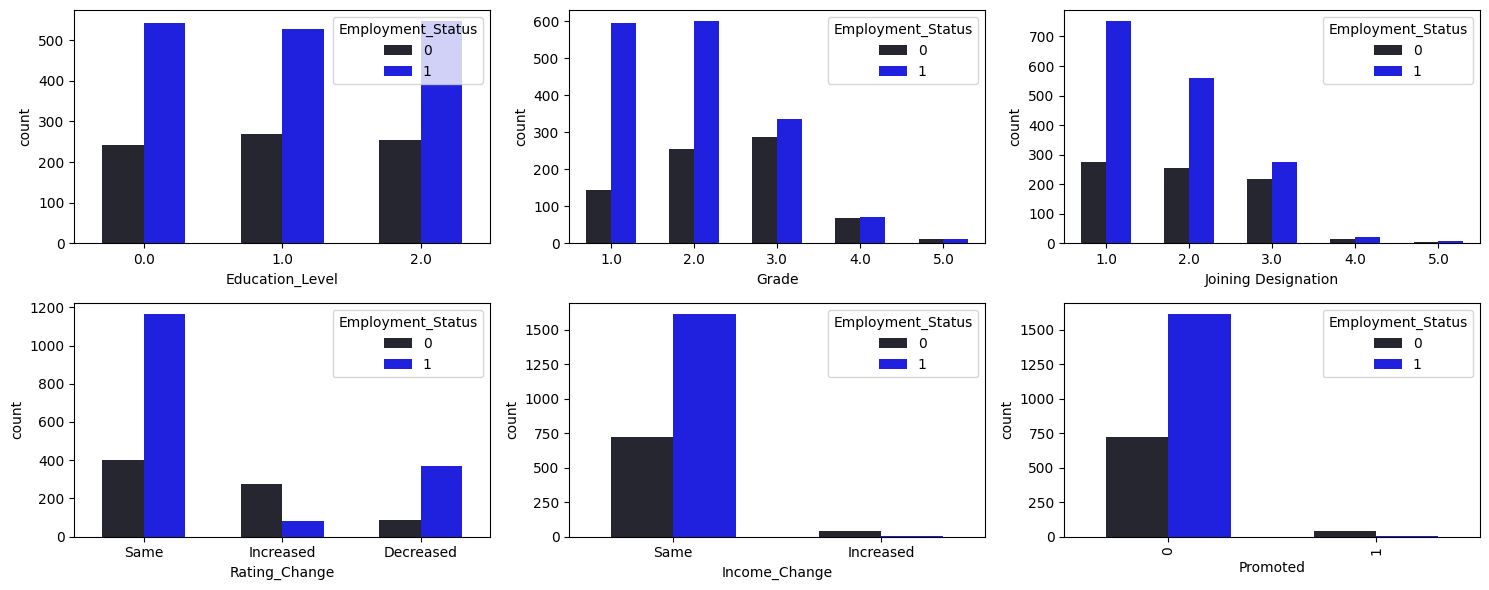

In [27]:
categorical = ['Education_Level','Grade','Joining Designation','Rating_Change','Income_Change','Promoted']
fig, axes = plt.subplots(2,3,figsize=(15,6))
for i,ax in enumerate(axes.flatten()):
  sns.countplot(data=df_new,x=categorical[i],ax=ax,hue='Employment_Status',color='blue',width=0.6,legend = True)
  plt.xticks(rotation=90)
  plt.tight_layout()
plt.show()

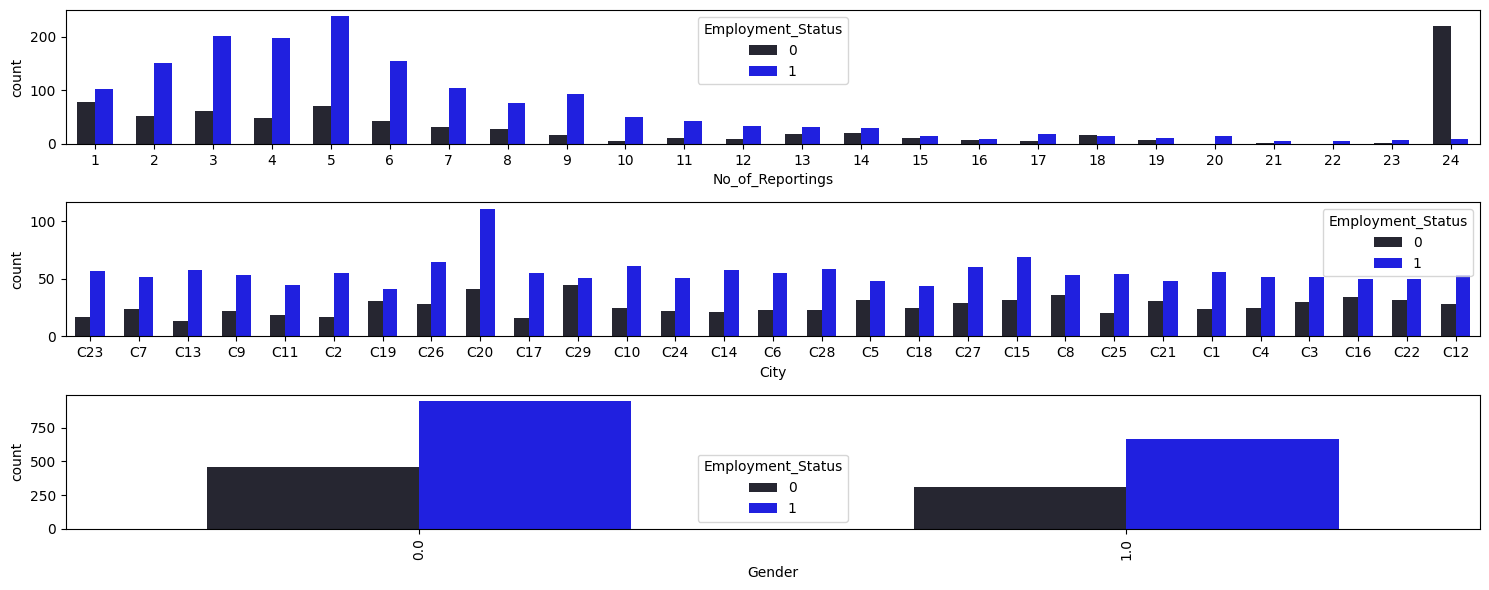

In [28]:
categorical = ['No_of_Reportings','City','Gender']
fig, axes = plt.subplots(3,1,figsize=(15,6))
for i,ax in enumerate(axes.flatten()):
  sns.countplot(data=df_new,x=categorical[i],ax=ax,hue='Employment_Status',color='blue',width=0.6)
  plt.xticks(rotation=90)
  plt.tight_layout()
plt.show()

In [29]:
age_bins = [11,21,31,41,51,61]
age_labels = ['11,21','21-31','31-41','41-51','51-61']
df_age = df_new.copy()
df_age['Age'] = pd.to_numeric(df_age['Age'], errors='coerce')
df_age['Age_bins'] = pd.cut(df_age['Age'],bins = age_bins, labels = age_labels,right=False)
df_age.groupby('Age_bins')['Driver_ID'].count().reset_index()

,Age_bins,Driver_ID
0,"11,21",0
1,21-31,746
2,31-41,1307
3,41-51,308
4,51-61,20


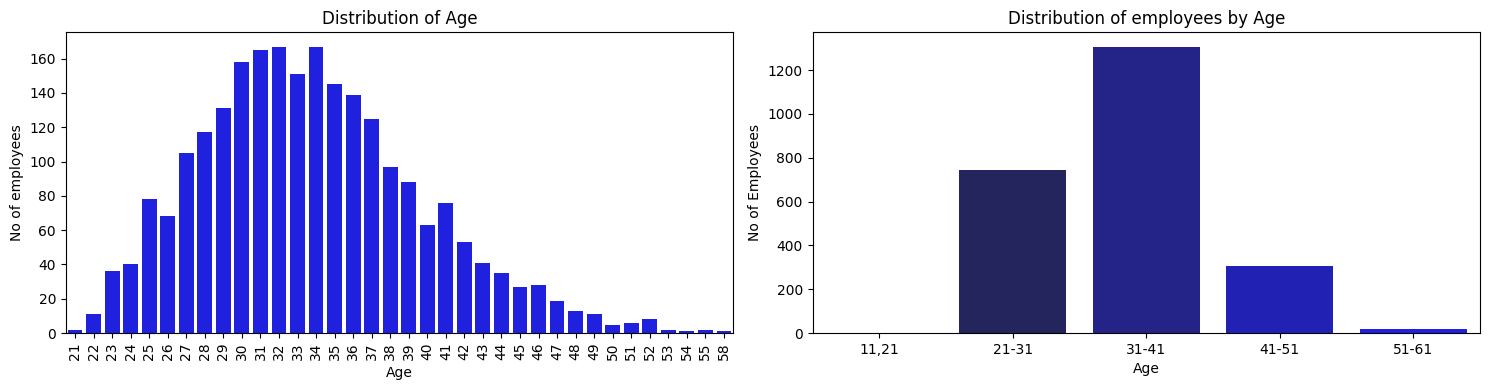

In [30]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df_new,x='Age',color='blue')
plt.title('Distribution of Age')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('No of employees')
plt.subplot(1,2,2)
sns.barplot(data=df_age.groupby('Age_bins')['Driver_ID'].count().reset_index(),x='Age_bins',y='Driver_ID',hue='Age_bins',color='blue')
plt.title('Distribution of employees by Age')
plt.xlabel('Age')
plt.ylabel('No of Employees')
plt.tight_layout()
plt.show()

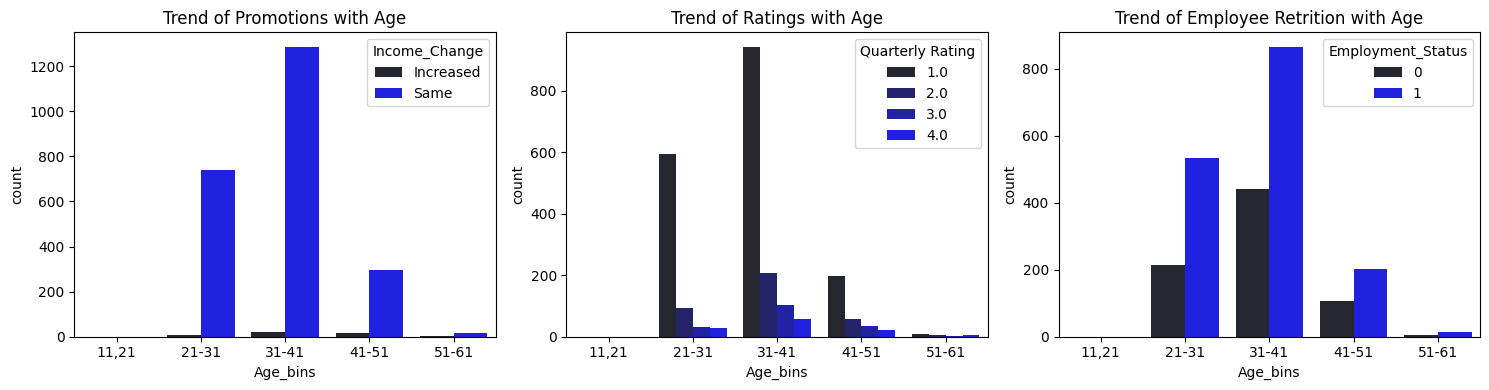

In [31]:
age_income = df_age.groupby('Age_bins')['Income_Change'].value_counts().reset_index()
rating_age = df_age.groupby('Age_bins')['Quarterly Rating'].value_counts().reset_index()
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.barplot(data=age_income,x='Age_bins',y='count',hue='Income_Change',color='blue')
plt.title('Trend of Promotions with Age')
plt.subplot(1,3,2)
sns.barplot(data=rating_age,x='Age_bins',y='count',hue='Quarterly Rating',color='blue')
plt.title('Trend of Ratings with Age')
plt.subplot(1,3,3)
sns.countplot(data=df_age,x='Age_bins',hue='Employment_Status',color='blue')
plt.title('Trend of Employee Retrition with Age')
plt.tight_layout()
plt.show()

**Key Observations from Uni-variate analyses:**

**1. Driver Demographics and Basic Statistics:**

 * Driver Pool: The dataset comprises 2381 Ola drivers.
 * Average Age: The average age of Ola drivers is 33 years.
 * Education: The driver pool is predominantly composed of graduates, with education levels relatively consistent across the population.
 * Gender Distribution: The driver pool is skewed towards males, with 1404 male drivers compared to 977 female drivers.
 * Geographic Distribution: Drivers are spread across 28 unique cities
 * Initial Designation: The majority of drivers were initially recruited at designation level 1.
 * Churn Rate: A significant churn rate is observed, with 1616 drivers having left the platform and 765 remaining active.
 * Rating Changes: A substantial portion of drivers (1565) experienced no rating changes, while 816 had rating changes.
 * Income Changes: The vast majority of drivers (2338) experienced no income changes, compared to 43 who did.

**2. Data Distribution and Outliers:**

 * Skewed Distributions: Age, number of reports, income, and total business value generated exhibit skewed normal distributions.
 * Business Value Outliers: Significant outliers in total business value suggest a subset of drivers contribute disproportionately, potentially linked to tenure or other factors needing further investigation
 * Income Outliers: Income data also contains notable outliers, indicating a segment of drivers with significantly higher earnings.

**3. Churn Rate by Categorical Variables:**
 * Gender: Male drivers exhibit a slightly higher churn rate than female drivers.
 * Education: Churn rates are relatively uniform across all education levels
 * Designation: Drivers at designation levels 1 and 2 show higher churn rates, while those at level 5 have the lowest.
 * Initial Joining Designation: Similar to current designation, drivers initially joining at designation levels 1 and 2 experience higher churn.
 * Rating Change: Drivers with no rating changes have a higher churn rate than those with rating changes.
 * Income Change: Drivers with no income changes have a higher churn rate than those with income changes.

**4. Churn Rate by Temporal and Regional Factors:**

 * City Impact: City C20 demonstrates the highest driver churn rate.
 * Reporting Frequency: Drivers with 5 reported incidents/feedback have the highest churn, while those with >15 reports have the lowest.
 * Temporal Trends: Peak attrition occurred in July 2020, with 2019 and 2020 showing significantly higher churn than previous years.
 * Recruitment Trends: Driver recruitment peaked in 2020, followed by 2019.
 * Age Distribution & Churn: The majority of drivers are aged 31-41, followed by 21-31. These age groups also exhibit the highest churn rates.
 * Quarterly Rating and Age: The 31-41 age group has a higher lowest quarterly rating compared to other groups.


## **Bi_Variate Analyses**

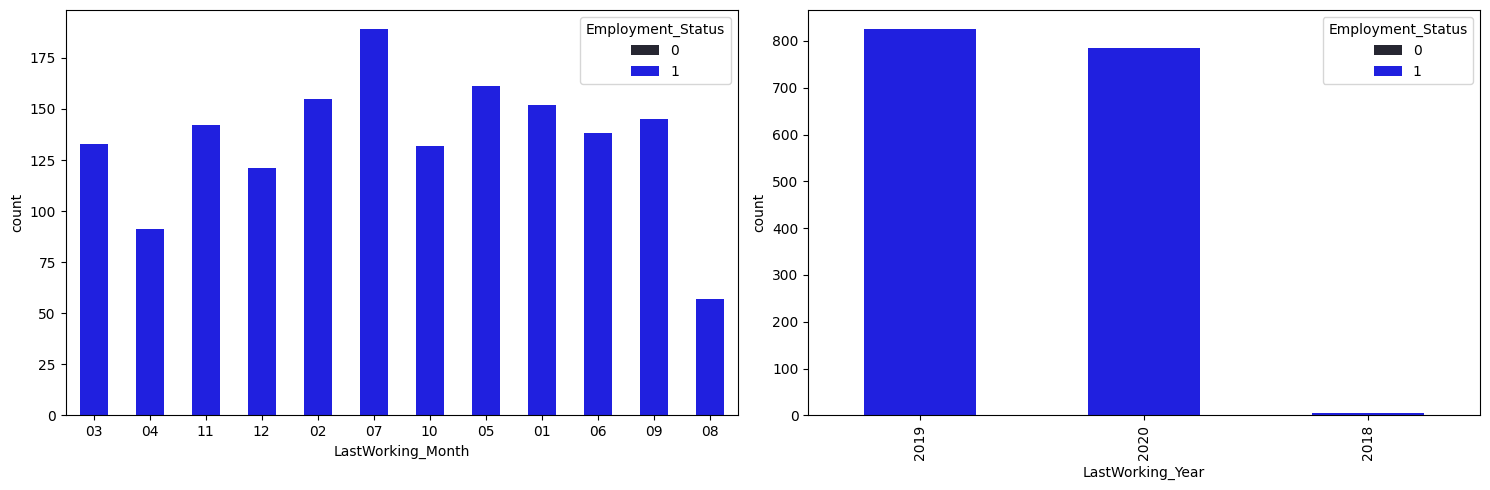

In [32]:
ola = df_new.copy()
ola['LastWorking_Month'] = ola['LastWorkingDate'].dt.strftime('%m')
ola['LastWorking_Year'] = ola['LastWorkingDate'].dt.strftime('%Y')
categorical = ['LastWorking_Month','LastWorking_Year']
fig, axes = plt.subplots(1,2,figsize=(15,5))
for i,ax in enumerate(axes.flatten()):
  sns.countplot(data=ola,x=categorical[i],ax=ax,hue='Employment_Status',color='blue',width=0.5)
  plt.xticks(rotation=90)
  plt.tight_layout()
plt.show()

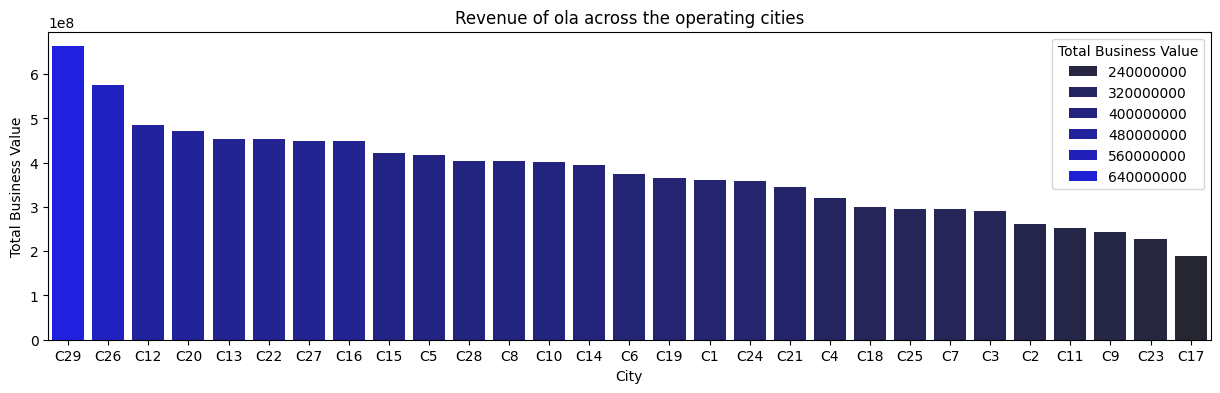

In [33]:
city_revenue = ola.groupby('City')['Total Business Value'].sum().reset_index().sort_values(by='Total Business Value',ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(data=city_revenue,x='City',y='Total Business Value',color='blue',hue='Total Business Value')
plt.title('Revenue of ola across the operating cities')
plt.show()

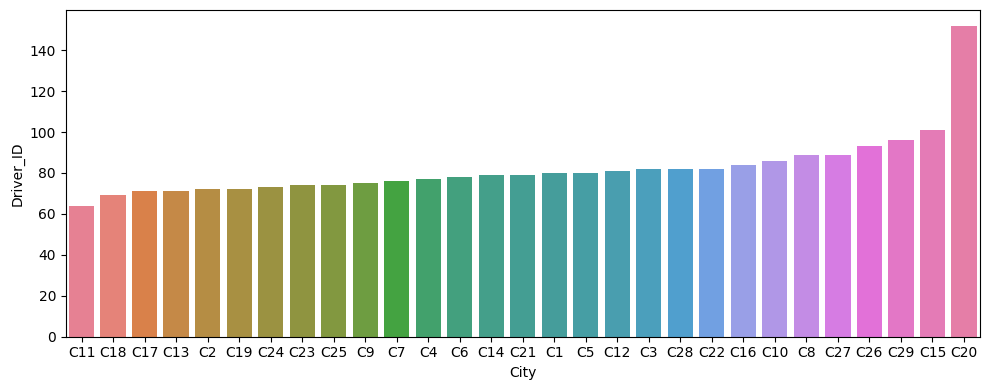

In [34]:
emp_per_city = ola.groupby('City')['Driver_ID'].count().reset_index().sort_values(by='Driver_ID')
plt.figure(figsize=(10,4))
sns.barplot(data=emp_per_city,x='City',y='Driver_ID',hue='City')
plt.tight_layout()
plt.show()

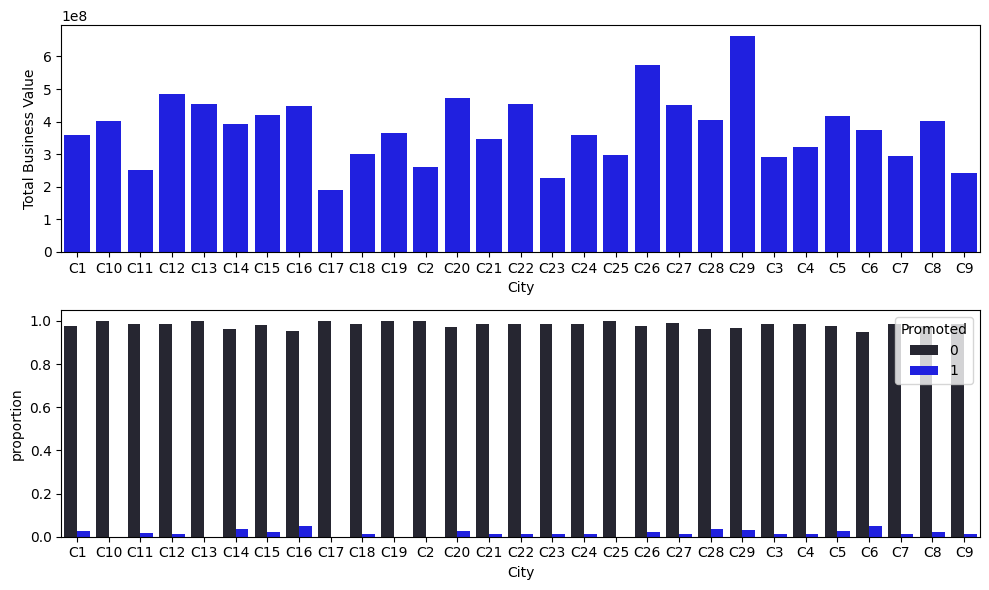

In [35]:
city_promoted_proportion = ola.groupby('City')['Promoted'].value_counts(normalize=True).reset_index()
city_business_value = ola.groupby('City')['Total Business Value'].sum().reset_index()
result = pd.merge(city_business_value, city_promoted_proportion, on='City', how='left')
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.barplot(data=result,x='City',y='Total Business Value',color='blue')
plt.subplot(2,1,2)
sns.barplot(data=result,x='City',y='proportion',hue='Promoted',color='blue')
plt.tight_layout()
plt.show()

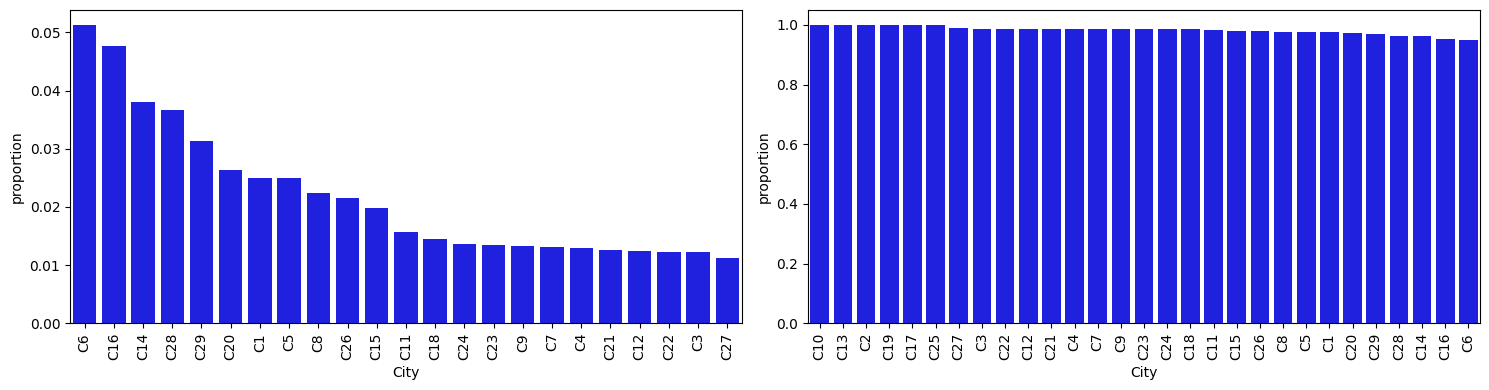

In [36]:
promoted = result[result['Promoted']==1].sort_values(by=['proportion'],ascending=False)
not_promoted = result[result['Promoted']==0].sort_values(by=['proportion'],ascending=False)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(data=promoted,x='City',y='proportion',color='blue')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=not_promoted,x='City',y='proportion',color='blue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

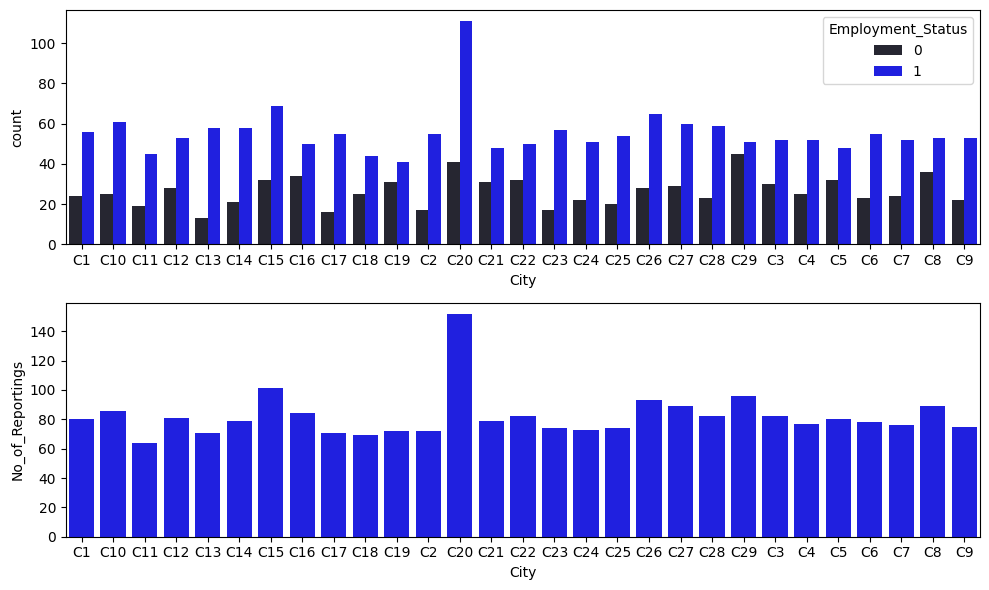

In [37]:
city_churn = ola.groupby('City')['Employment_Status'].value_counts().reset_index()
city_reportings = ola.groupby('City')['No_of_Reportings'].count().reset_index()
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.barplot(data= city_churn,x='City',y='count',hue='Employment_Status',color='blue')
plt.subplot(2,1,2)
sns.barplot(data= city_reportings,x='City',y='No_of_Reportings',color='blue')
plt.tight_layout()
plt.show()

<Axes: xlabel='Income', ylabel='Total Business Value'>

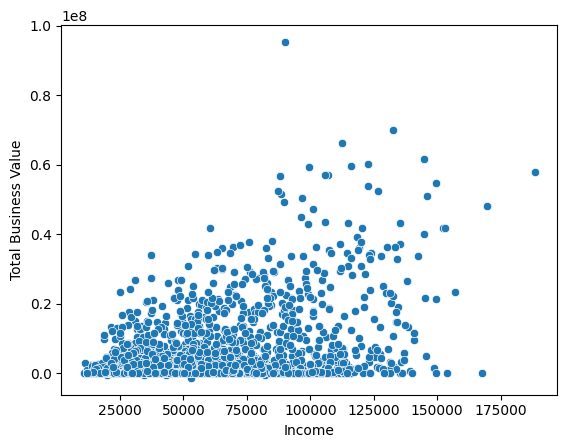

In [38]:
sns.scatterplot(data=df_new,x='Income',y='Total Business Value')

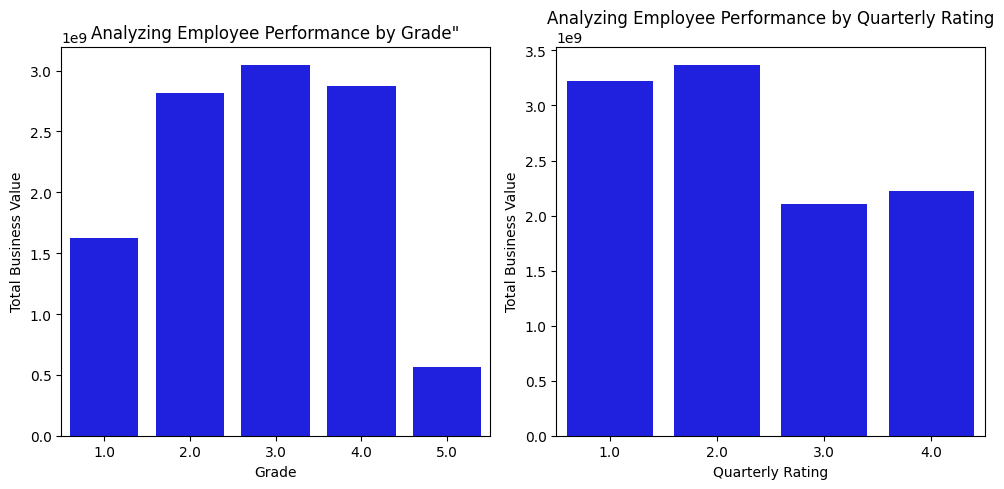

In [39]:
grade_revenue = ola.groupby('Grade')['Total Business Value'].sum().reset_index()
QR_revenue = ola.groupby('Quarterly Rating')['Total Business Value'].sum().reset_index()
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=grade_revenue,x='Grade',y='Total Business Value',color='blue')
plt.title('Analyzing Employee Performance by Grade"')
plt.subplot(1,3,2)
sns.barplot(data=QR_revenue,x='Quarterly Rating',y='Total Business Value',color='blue')
plt.title('Analyzing Employee Performance by Quarterly Rating')
plt.tight_layout()
plt.show()

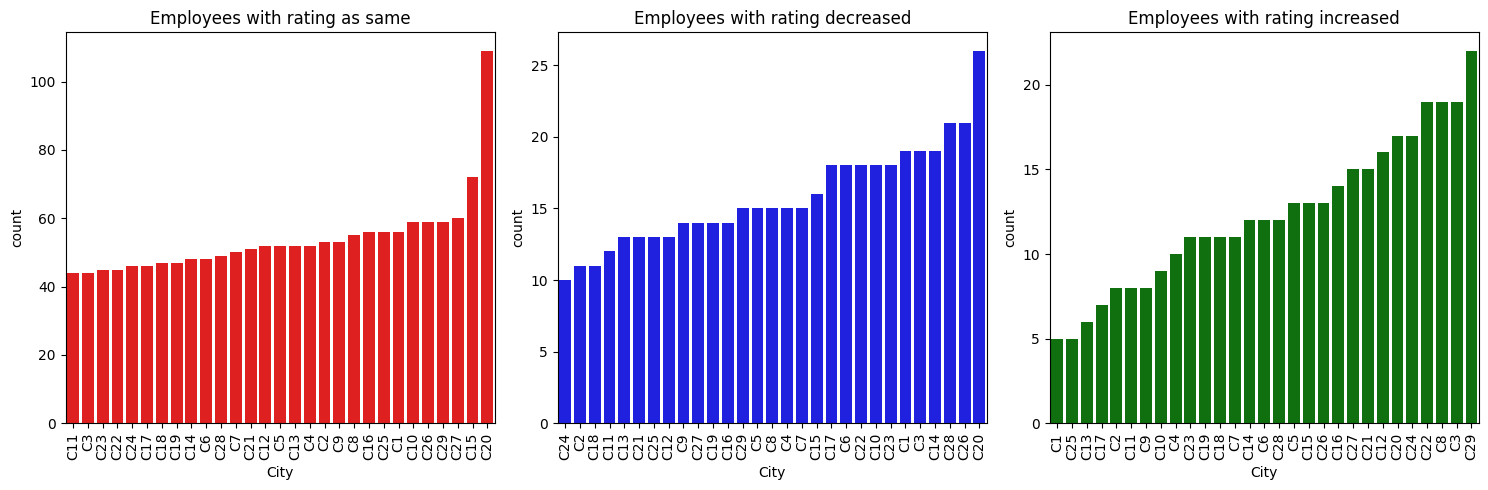

In [40]:
city_rating = ola.groupby('City')['Rating_Change'].value_counts().reset_index()
Rating_same = city_rating[city_rating['Rating_Change']=='Same'].sort_values(by='count')
Rating_decreased = city_rating[city_rating['Rating_Change']=='Decreased'].sort_values(by='count')
Rating_increased = city_rating[city_rating['Rating_Change']=='Increased'].sort_values(by='count')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=Rating_same,x='City',y='count',color='red')
plt.title('Employees with rating as same')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(data=Rating_decreased,x='City',y='count',color='blue')
plt.title('Employees with rating decreased')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.barplot(data=Rating_increased,x='City',y='count',color='green')
plt.title('Employees with rating increased')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

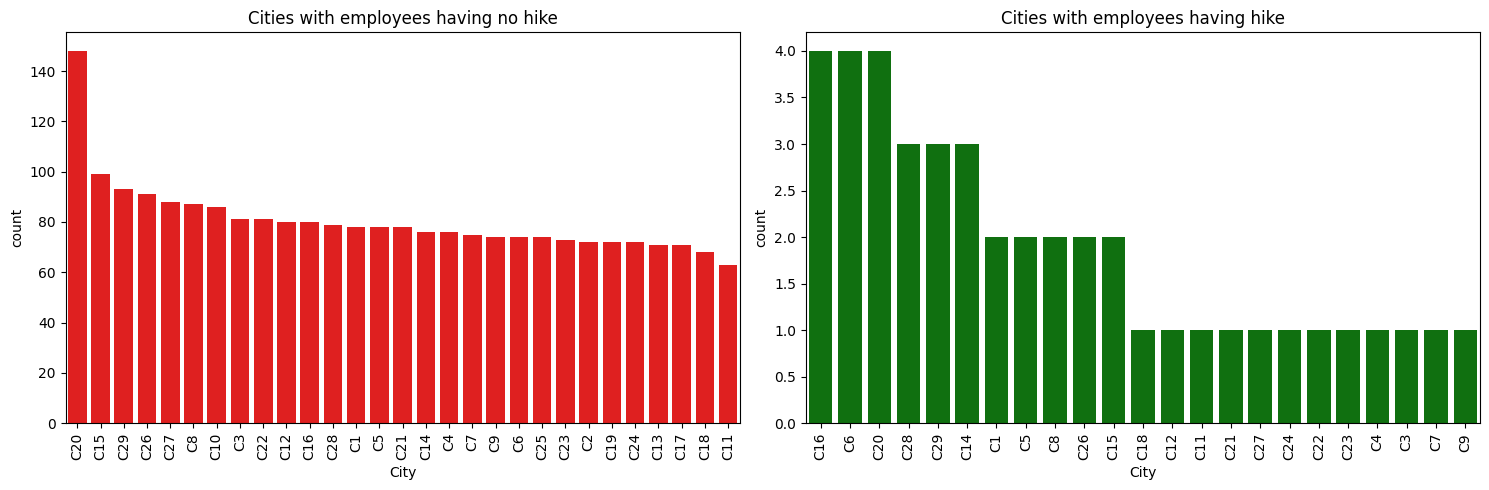

In [41]:
city_income = ola.groupby('City')['Income_Change'].value_counts().reset_index()
same_income = city_income[city_income['Income_Change']=='Same'].sort_values(by='count',ascending=False)
increased_income = city_income[city_income['Income_Change']=='Increased'].sort_values(by='count',ascending=False)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=same_income,x='City',y='count',color='red')
plt.title('Cities with employees having no hike')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=increased_income,x='City',y='count',color='green')
plt.title('Cities with employees having hike')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

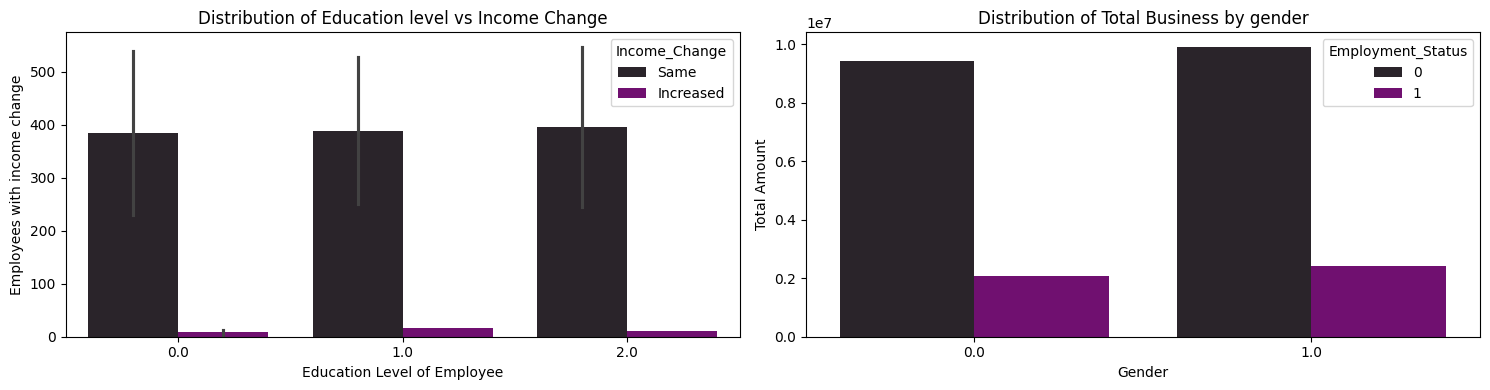

In [42]:
education_impact = ola.groupby(['Education_Level','Employment_Status'])['Income_Change'].value_counts().reset_index()
gender_impact = df_new.groupby(['Gender','Employment_Status'])['Total Business Value'].mean().round(2).reset_index()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(data= education_impact,x='Education_Level',y='count',hue='Income_Change',color='purple')
plt.title('Distribution of Education level vs Income Change')
plt.xlabel('Education Level of Employee')
plt.ylabel('Employees with income change')
plt.subplot(1,2,2)
sns.barplot(data= gender_impact,x='Gender',y='Total Business Value',hue='Employment_Status',color='purple')
plt.title('Distribution of Total Business by gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

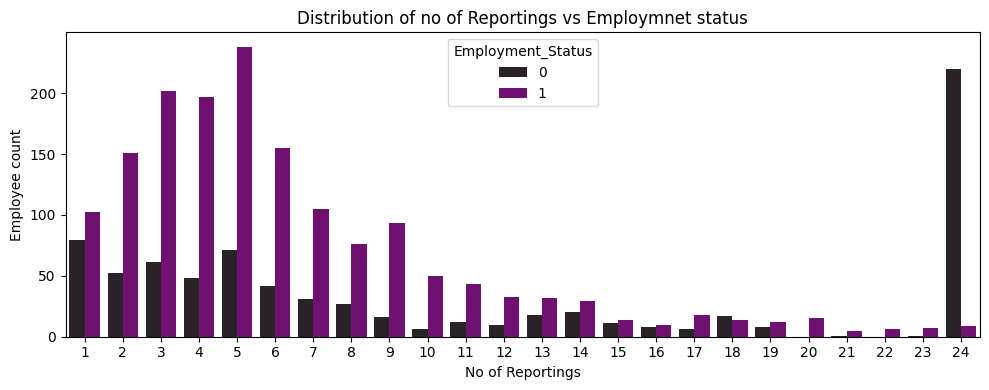

In [43]:
reportings = ola.groupby('No_of_Reportings')['Employment_Status'].value_counts().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data= reportings,x='No_of_Reportings',y='count',hue='Employment_Status',color='purple')
plt.title('Distribution of no of Reportings vs Employmnet status')
plt.xlabel('No of Reportings')
plt.ylabel('Employee count')
plt.tight_layout()
plt.show()

In [44]:
ola.columns

Index(['Driver_ID', 'No_of_Reportings', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Employment_Status', 'Rating_Change', 'Promoted',
       'Income_Change', 'LastWorking_Month', 'LastWorking_Year'],
      dtype='object')

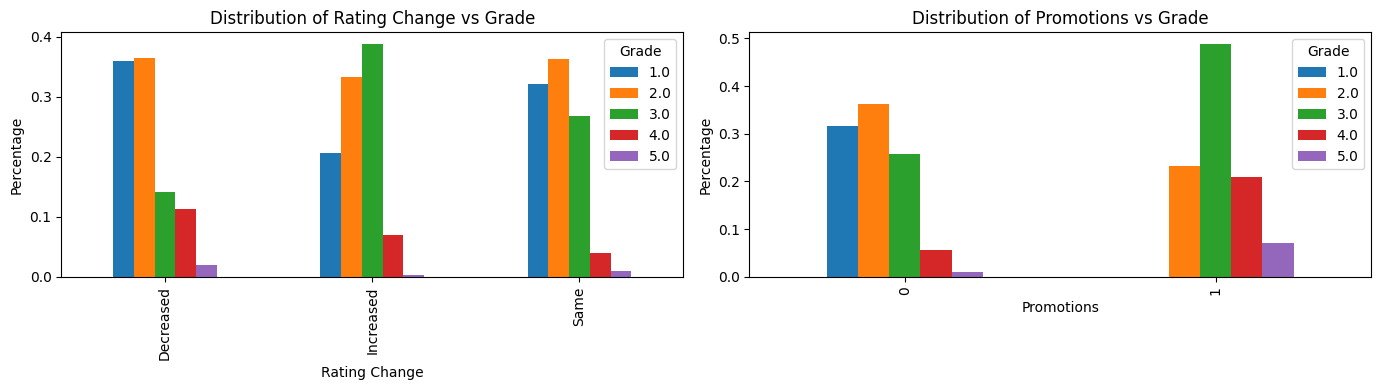

In [45]:
grade_rating = pd.crosstab(ola['Rating_Change'], ola['Grade'], normalize='index')
grade_promotions = pd.crosstab(ola['Promoted'], ola['Grade'], normalize='index')

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
grade_rating.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Rating Change vs Grade')
plt.xlabel('Rating Change')
plt.ylabel('Percentage')
plt.subplot(1, 2, 2)
grade_promotions.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Promotions vs Grade')
plt.xlabel('Promotions')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

**Bivariate Analysis Key Observations:**

**1. City-Level Revenue, Churn, and Promotions:**
 * Revenue Disparity: City C29 demonstrates the highest revenue generation, while city C17 exhibits the lowest. This highlights significant regional performance differences.
 * City Size and Driver Count: City C20 has the largest driver population, while city C11 has the smallest, impacting service capacity and potential revenue.
 * Promotion Disparity:
  * A high percentage of drivers across all cities, including high-revenue ones, have not received promotions, indicating a potential systemic issue.
   * City C6 has the highest proportion of drivers that have been promoted, while C27 has the lowest.
 * Churn and Reporting in C20: City C20 experiences the highest driver churn rate and the highest number of reported incidents/feedback, suggesting underlying challenges in that location.

**2. Revenue Contribution by Driver Performance and Grade:**
 * Revenue by Grade: Drivers in grades 2, 3, and 4 contribute the most to revenue, indicating a concentration of high-performing drivers in these grades.
 * Revenue by Quarterly Rating: Drivers with lower quarterly ratings (1 and 2) contribute a significant portion of revenue. This suggests that even lower-rated drivers are valuable and need to be retained.

**3. City-Level Rating and Income Changes:**
 * Rating Changes in C20 and C29:
  * City C20 has the highest number of drivers with no rating change and rating decreases, indicating potential dissatisfaction or performance issues.
   * City C29 has the highest number of drivers with increased ratings, indicating positive performance trends.
 * Income Changes in C20: City C20 has a high number of drivers both with and without income increases, which may indicate income inequality, or other economic issues.

**4. Churn Drivers and Demographics:**
 * Education and Income Changes: Education level does not significantly impact whether drivers receive income increases or not.
 * Gender and Revenue: Both male and female drivers contribute similarly to revenue, regardless of churn status, demonstrating that gender is not a strong indicator of revenue generation.
 * Reporting and Churn: Drivers with fewer reported incidents/feedback (less than 10) have a higher churn rate, while those with the highest reporting rates (24) have the highest retention. This highlights the importance of driver engagement and communication.

**5. Grade-Level Rating and Promotion Trends:**
 * Rating Decreases: Drivers in grades 1 and 2 have a high percentage of rating decreases, indicating potential performance or satisfaction issues at lower grades.
 * Rating Increases: Drivers in grades 2 and 3 have a high percentage of rating increases, suggesting positive performance trends in these grades.
 * Rating Stability: Drivers in grades 1, 2, and 3 have a high percentage of no rating changes, potentially indicating a lack of performance feedback or career progression.
 * Promotion Disparity: Drivers in grades 1 and 2 have a low percentage of promotions, while drivers in grade 3 have a high percentage, revealing a potential bottleneck in career advancement for lower-grade drivers.

## **Correlation**

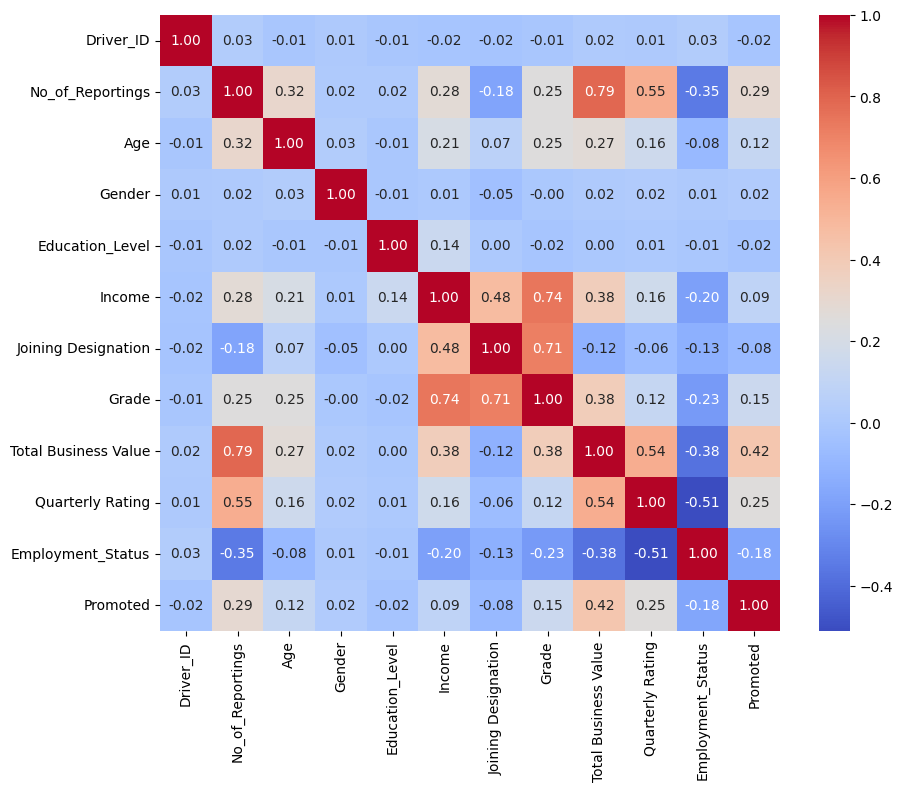

In [46]:
df_c = df_new.copy()
numerical = df_c.select_dtypes(include=['int64', 'float64'])
correlation = numerical.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,annot=True, fmt=".2f",cmap = 'coolwarm')
plt.show()

**Observations from Correlation Analysis**

**Strongest Correlation:**
 * The highest correlation (0.79) is observed between Total Business Value and Number of Reportings, indicating that employees managing larger teams tend to contribute more to the business value.

**Income, Joining Designation, and Grade Relationship:**
 * These variables are highly correlated with each other, suggesting that employees with higher starting designations and grades tend to have higher incomes.

**Income’s Influence:**
 * Positive correlation is observed between Income and Number of Reportings:
  * Higher-paid employees tend to have more direct reports.

**Joining Designation & Grade:**  
* Reinforces the idea that career progression leads to higher salaries.

**Total Business Value:**
 * Employees with higher income contribute more to business outcomes.

**Employment Status & Performance Indicators:**
 * Employment Status (active vs. churned) has a negative correlation with:
  * Number of Reportings (-0.35): Employees with fewer reportees are more likely to leave.
  * Total Business Value (-0.38): Those generating lower business value are more prone to churn.
  * Quarterly Rating (-0.51): Employees with lower ratings are more likely to leave the organization.

**Age Factor in Performance:**
* Age shows a positive correlation with:
 * Number of Reportings (0.32): Older employees tend to manage more people
 * Grade (0.25) and Business Value (0.27): Senior employees contribute more, likely due to experience.

**Impact of Promotions:**

* Being Promoted is positively correlated with:
 * Number of Reportings (0.29): Promoted employees often manage larger teams
  * Total Business Value (0.45): Higher contributions lead to career advancement.
  * Quarterly Rating (0.25): Consistent high ratings increase promotion chances.



## **Model Training - Ensemble Techniques**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [48]:
df_new.head()

,Driver_ID,No_of_Reportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Employment_Status,Rating_Change,Promoted,Income_Change
0,1,3,28,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,1,Same,0,Same
1,2,2,31,0.0,C7,2.0,67016.0,2020-11-06,NaT,2.0,2.0,0.0,1.0,0,Same,0,Same
2,4,5,43,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,1,Same,0,Same
3,5,3,29,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,1,Same,0,Same
4,6,5,31,1.0,C11,1.0,78728.0,2020-07-31,NaT,3.0,3.0,1265000.0,2.0,0,Increased,0,Same


In [49]:
df_new.columns

Index(['Driver_ID', 'No_of_Reportings', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Employment_Status', 'Rating_Change', 'Promoted',
       'Income_Change'],
      dtype='object')

In [50]:
df_model = df_new.copy()
df_model = df_model.drop(columns=['Dateofjoining','LastWorkingDate'],axis=1)
#df_model['City'] = df_model['City'].str.extract(r'(\d+)', expand=False).astype(int)

In [51]:
def one_hot_encode_categorical(df, column_name):
    """One-hot encodes a single categorical column."""
    df = pd.get_dummies(df, columns=[column_name], prefix=column_name)
    return df

In [52]:
df_model.columns

Index(['Driver_ID', 'No_of_Reportings', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Employment_Status',
       'Rating_Change', 'Promoted', 'Income_Change'],
      dtype='object')

In [53]:
columns_to_encode = ['Rating_Change', 'Income_Change','City']

df_model = pd.get_dummies(df_model, columns=columns_to_encode)

# Identify the newly created dummy columns
dummy_cols = []
for col in df_model.columns:
    for original_col in columns_to_encode:
        if col.startswith(original_col + '_'):
            dummy_cols.append(col)
            break # only add once

# Convert only the dummy columns to integers
df_model[dummy_cols] = df_model[dummy_cols].astype(int)

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Driver_ID                2381 non-null   int64  
 1   No_of_Reportings         2381 non-null   int64  
 2   Age                      2381 non-null   Int64  
 3   Gender                   2381 non-null   float64
 4   Education_Level          2381 non-null   float64
 5   Income                   2381 non-null   float64
 6   Joining Designation      2381 non-null   float64
 7   Grade                    2381 non-null   float64
 8   Total Business Value     2381 non-null   float64
 9   Quarterly Rating         2381 non-null   float64
 10  Employment_Status        2381 non-null   int64  
 11  Promoted                 2381 non-null   int64  
 12  Rating_Change_Decreased  2381 non-null   int64  
 13  Rating_Change_Increased  2381 non-null   int64  
 14  Rating_Change_Same      

In [54]:
df_model.head()

,Driver_ID,No_of_Reportings,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,3,28,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,31,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,4,5,43,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5,3,29,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,6,5,31,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X = df_model.drop(columns=['Employment_Status','Driver_ID','Quarterly Rating','Joining Designation'],axis=1)
y = df_model['Employment_Status']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1904, 42), (477, 42), (1904,), (477,))

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [115]:
y_train_resampled.value_counts()

,count
Employment_Status,
0,1289
1,1289


**KNN model**

In [116]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [117]:
y_pred = model.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.48      0.56      0.52       150
           1       0.78      0.72      0.75       327

    accuracy                           0.67       477
   macro avg       0.63      0.64      0.63       477
weighted avg       0.69      0.67      0.68       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1289
           1       0.89      0.81      0.85      1289

    accuracy                           0.86      2578
   macro avg       0.86      0.86      0.86      2578
weighted avg       0.86      0.86      0.86      2578



**Random Forest Model**

In [118]:
model1 = RandomForestClassifier(n_estimators=500,max_depth=5)
model1.fit(X_train_resampled,y_train_resampled)
y_pred1 = model1.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred1))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model1.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.80      0.56      0.66       150
           1       0.82      0.94      0.88       327

    accuracy                           0.82       477
   macro avg       0.81      0.75      0.77       477
weighted avg       0.82      0.82      0.81       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78      1289
           1       0.74      0.92      0.82      1289

    accuracy                           0.80      2578
   macro avg       0.82      0.80      0.80      2578
weighted avg       0.82      0.80      0.80      2578



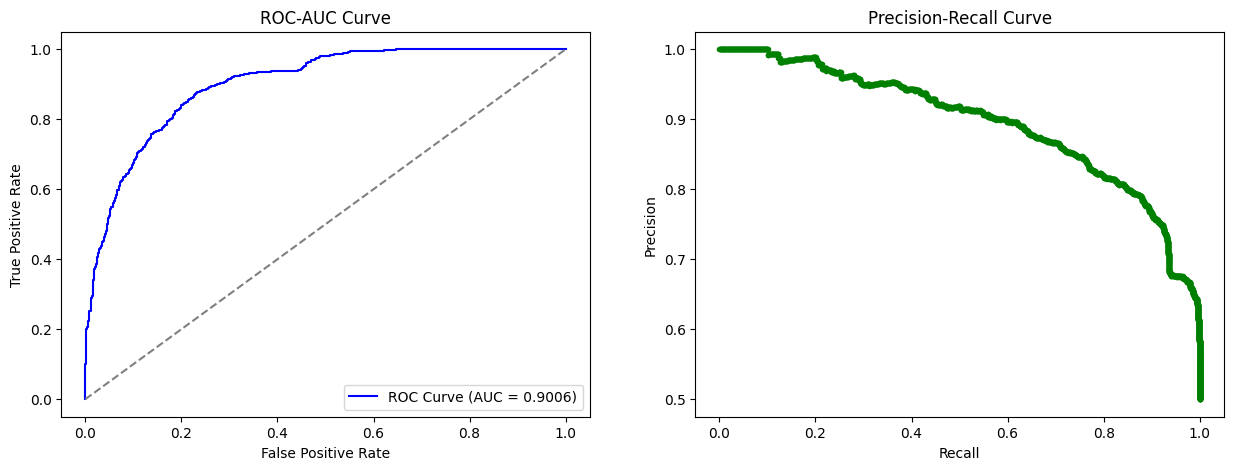

In [119]:
y_prob1 = model1.predict_proba(X_train_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_train_resampled, y_prob1)
auc_score = roc_auc_score(y_train_resampled, y_prob1)
precision, recall, _ = precision_recall_curve(y_train_resampled, y_prob1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(recall, precision, marker='.', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

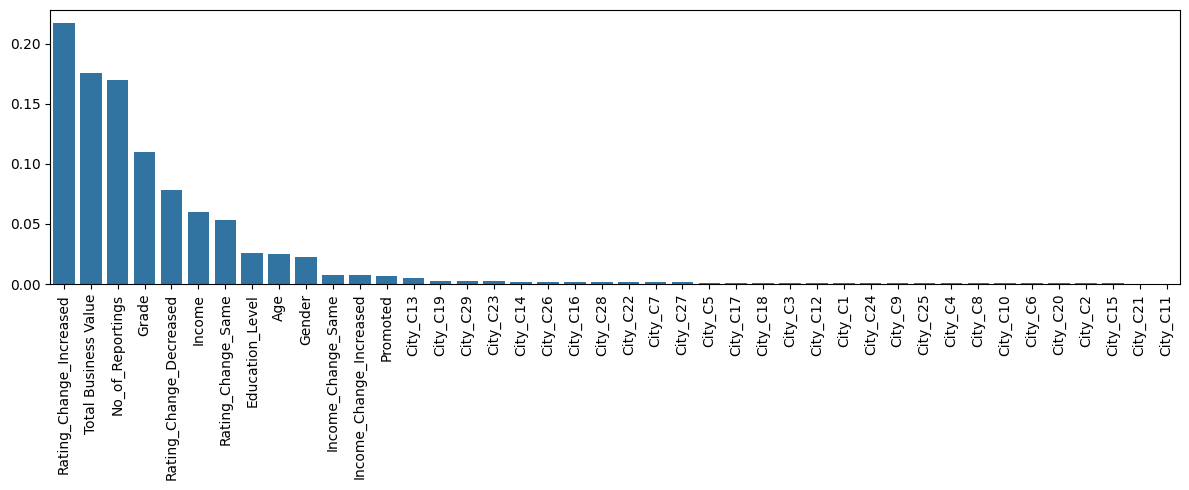

In [120]:
feature_importance1 = model1.feature_importances_
features1 = X.columns
feature_importance_dict1 = dict(zip(features1, feature_importance1))
feature_importance_series1 = pd.Series(feature_importance_dict1).sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(feature_importance_series1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Accuracy with 1 estimators: 0.7610062893081762
Accuracy with 5 estimators: 0.7819706498951782
Accuracy with 10 estimators: 0.7672955974842768
Accuracy with 20 estimators: 0.7819706498951782
Accuracy with 50 estimators: 0.8029350104821803
Accuracy with 100 estimators: 0.8092243186582809
Accuracy with 200 estimators: 0.8113207547169812
Accuracy with 300 estimators: 0.8113207547169812
Accuracy with 500 estimators: 0.8092243186582809
Accuracy with 1000 estimators: 0.8092243186582809
Accuracy with 1500 estimators: 0.8092243186582809


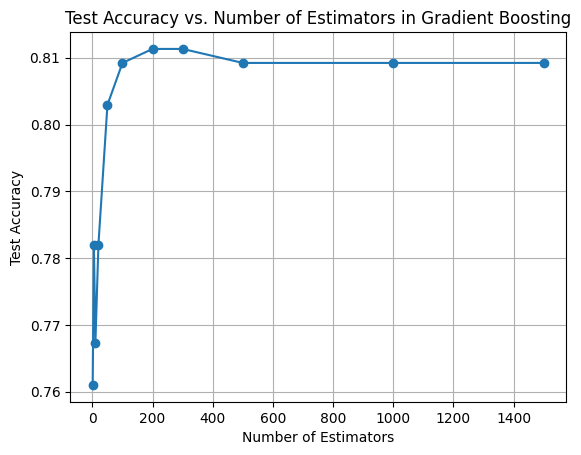

In [121]:
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300, 500,1000,1500]
test_accuracies = []
for n_estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=10)
    clf.fit(X_train_resampled, y_train_resampled)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy}")
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Estimators in Gradient Boosting')
plt.grid(True)
plt.show()

**Gradient Boost Classifier**

In [122]:
model2 = GradientBoostingClassifier(n_estimators=100,max_depth=3)
model2.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier()

In [123]:
y_pred2 = model2.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred2))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model2.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.81      0.62      0.70       150
           1       0.84      0.93      0.89       327

    accuracy                           0.83       477
   macro avg       0.83      0.78      0.79       477
weighted avg       0.83      0.83      0.83       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1289
           1       0.86      0.93      0.89      1289

    accuracy                           0.89      2578
   macro avg       0.89      0.89      0.89      2578
weighted avg       0.89      0.89      0.89      2578



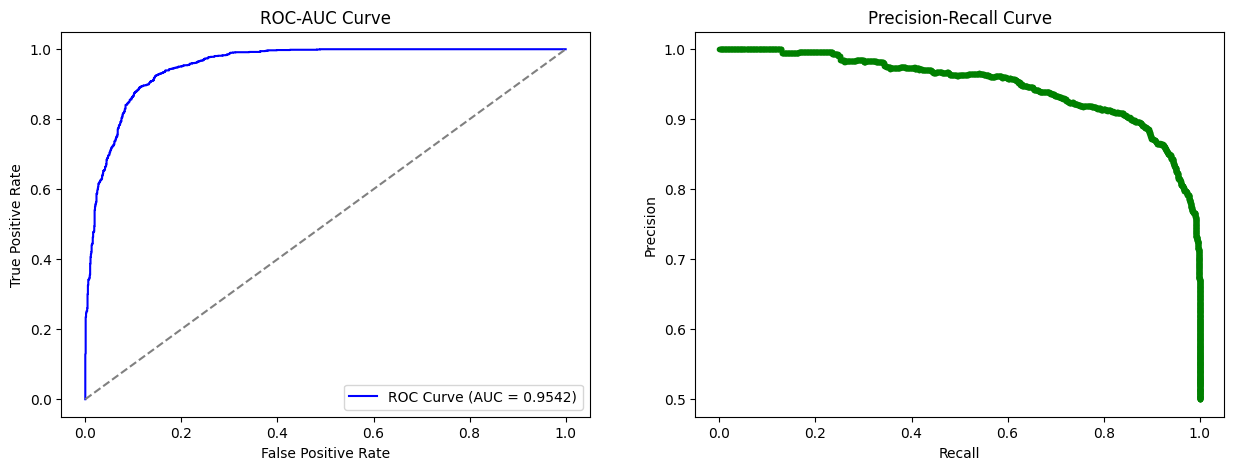

In [124]:
y_prob2 = model2.predict_proba(X_train_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_train_resampled, y_prob2)
auc_score = roc_auc_score(y_train_resampled, y_prob2)
precision, recall, _ = precision_recall_curve(y_train_resampled, y_prob2)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(recall, precision, marker='.', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

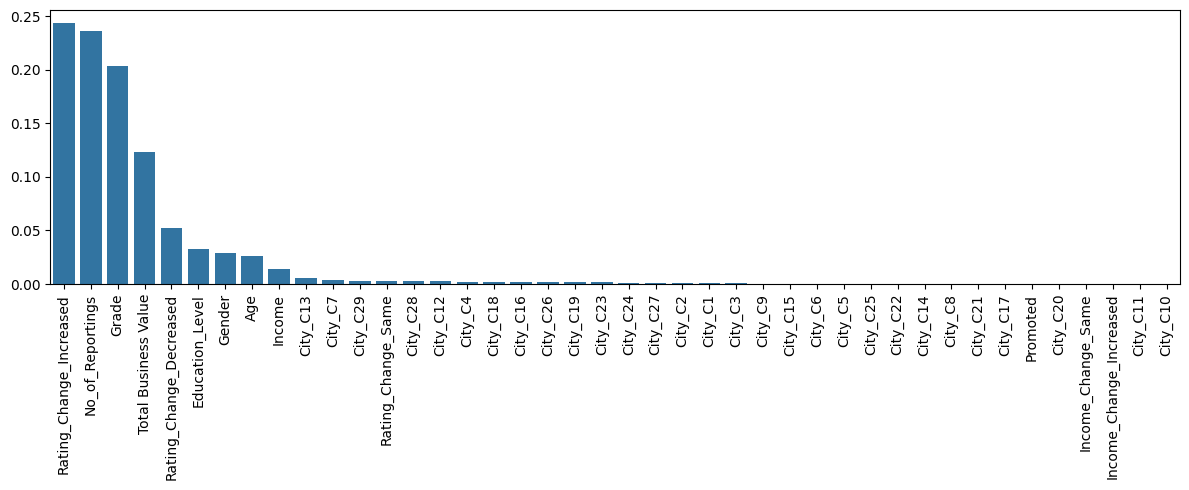

In [125]:
feature_importance2 = model2.feature_importances_
features2 = X.columns
feature_importance_dict2 = dict(zip(features2, feature_importance2))
feature_importance_series2 = pd.Series(feature_importance_dict2).sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(feature_importance_series2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Accuracy with 1 estimators: 0.8280922431865828
Accuracy with 5 estimators: 0.8280922431865828
Accuracy with 10 estimators: 0.8322851153039832
Accuracy with 20 estimators: 0.8301886792452831
Accuracy with 50 estimators: 0.8385744234800838
Accuracy with 100 estimators: 0.8343815513626834
Accuracy with 200 estimators: 0.8259958071278826
Accuracy with 300 estimators: 0.8301886792452831
Accuracy with 500 estimators: 0.8176100628930818


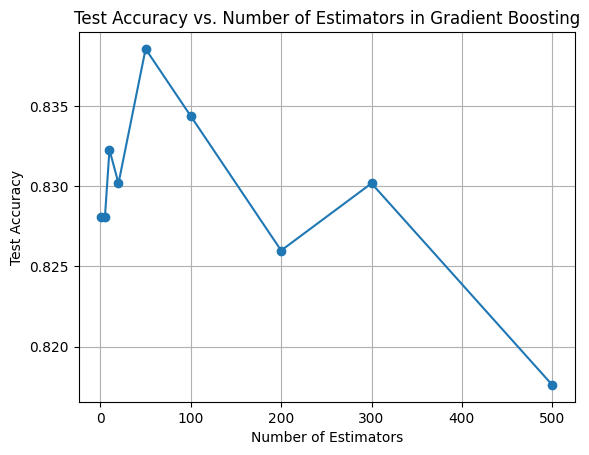

In [126]:
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300, 500]
test_accuracies = []

for n_estimators in n_estimators_list:
    clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=10)
    clf.fit(X_train_resampled, y_train_resampled)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy}")
# Plotting the test accuracies
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Estimators in Gradient Boosting')
plt.grid(True)
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV
# Defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5, 8],
    'min_samples_split': [2, 4, 6]}

# Initializing the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=10)
# Setting up the grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, scoring = "accuracy", cv=2, n_jobs = -1, verbose = 1)
# Fitting the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)
# Printing the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
result = grid_search.cv_results_
for i in range(len(result["params"])):
  print(f"Parameters:{result['params'][i]} Mean_score: {result['mean_test_score'][i]} Rank: {result['rank_test_score'][i]}")
print(grid_search.best_estimator_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best parameters: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 100}
Best cross-validation score: 0.7684251357641583
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100} Mean_score: 0.7323506594259115 Rank: 19
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200} Mean_score: 0.7265321955003878 Rank: 23
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300} Mean_score: 0.7234290147401086 Rank: 26
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100} Mean_score: 0.7292474786656322 Rank: 21
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200} Mean_score: 0.730411171450737 Rank: 20
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300} Mean_score: 0.7242048099301784 Rank: 25
Parameters:{'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100} Mean_score: 0.7276958882854927 Rank: 22
Parameters:{'max_depth

**XG Boost Classifier**

In [128]:
from xgboost import XGBClassifier
model3 = XGBClassifier(n_estimators=20)
model3.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
y_pred3 = model3.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred3))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model3.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.79      0.62      0.70       150
           1       0.84      0.93      0.88       327

    accuracy                           0.83       477
   macro avg       0.82      0.77      0.79       477
weighted avg       0.83      0.83      0.82       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      1289
           1       0.88      0.93      0.91      1289

    accuracy                           0.90      2578
   macro avg       0.91      0.90      0.90      2578
weighted avg       0.91      0.90      0.90      2578



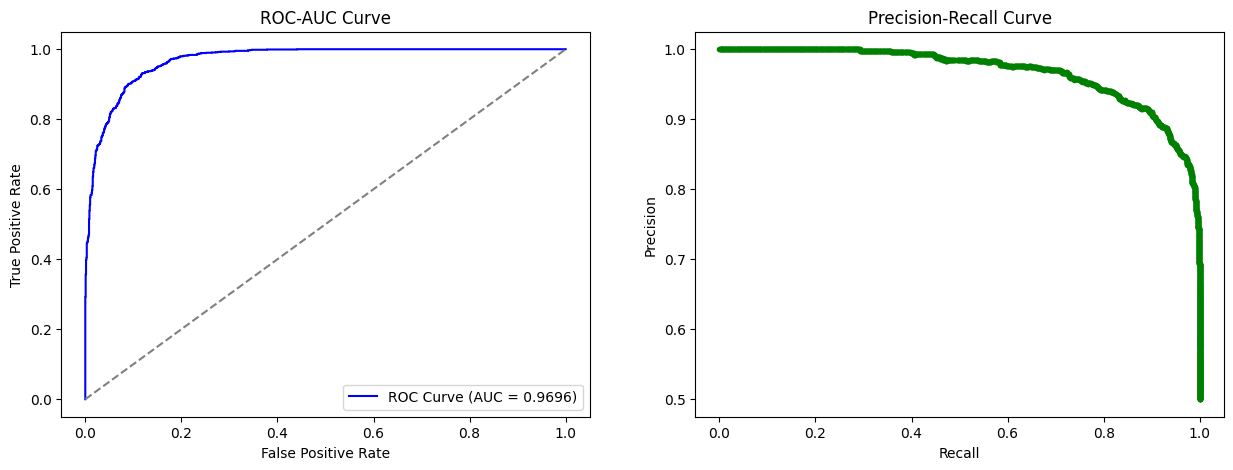

In [130]:
y_prob3 = model3.predict_proba(X_train_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_train_resampled, y_prob3)
auc_score = roc_auc_score(y_train_resampled, y_prob3)
precision, recall, _ = precision_recall_curve(y_train_resampled, y_prob3)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(recall, precision, marker='.', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

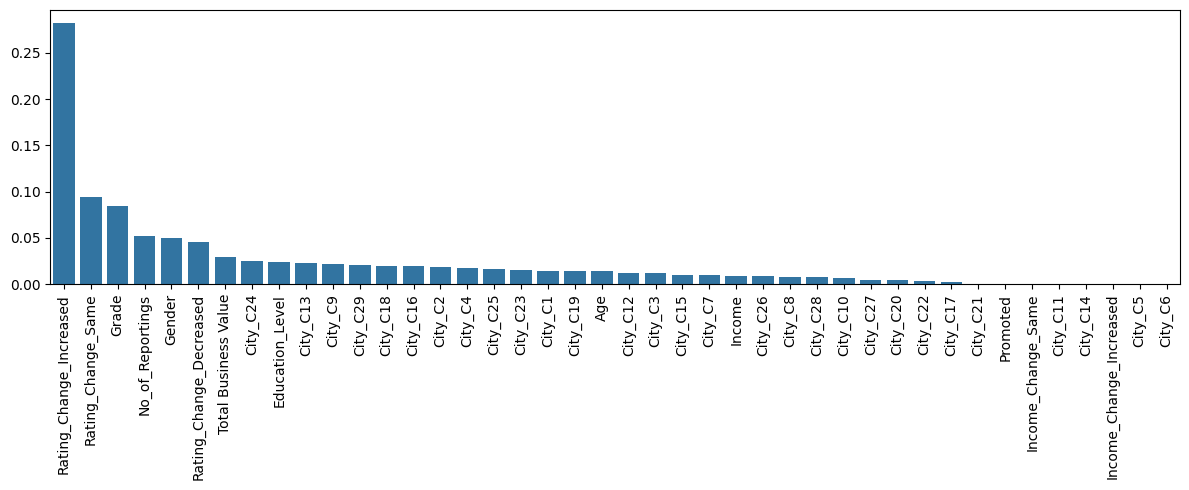

In [131]:
feature_importance3 = model3.feature_importances_
features3 = X.columns
feature_importance_dict3 = dict(zip(features3, feature_importance3))
feature_importance_series3 = pd.Series(feature_importance_dict3).sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(feature_importance_series3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**LG Boosting Classifier**

In [132]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier(n_estimators=20,max_depth=4)
model4.fit(X_train_resampled,y_train_resampled)

[LightGBM] [Info] Number of positive: 1289, number of negative: 1289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1788
[LightGBM] [Info] Number of data points in the train set: 2578, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

LGBMClassifier(max_depth=4, n_estimators=20)

In [133]:
y_pred4 = model4.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred4))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model4.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       150
           1       0.84      0.94      0.88       327

    accuracy                           0.83       477
   macro avg       0.83      0.77      0.79       477
weighted avg       0.83      0.83      0.82       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1289
           1       0.80      0.91      0.85      1289

    accuracy                           0.84      2578
   macro avg       0.85      0.84      0.84      2578
weighted avg       0.85      0.84      0.84      2578



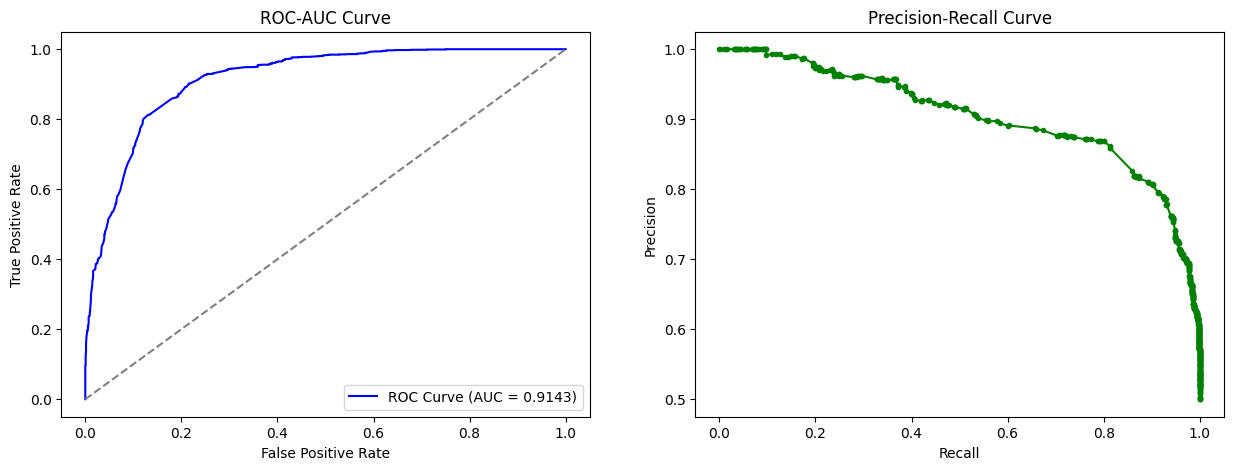

In [134]:
y_prob4 = model4.predict_proba(X_train_resampled)[:, 1]
fpr, tpr, _ = roc_curve(y_train_resampled, y_prob4)
auc_score = roc_auc_score(y_train_resampled, y_prob4)
precision, recall, _ = precision_recall_curve(y_train_resampled, y_prob4)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(recall, precision, marker='.', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

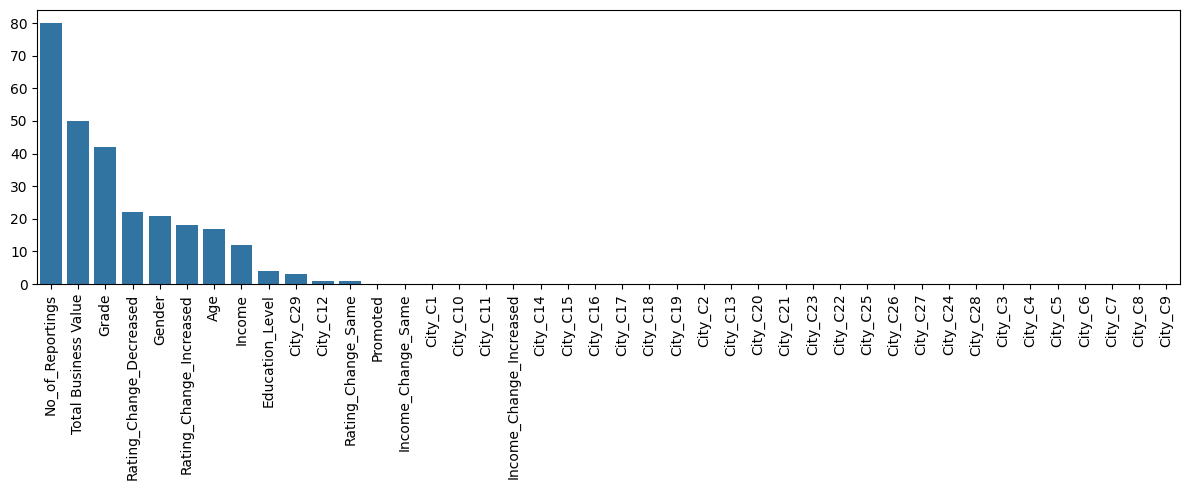

In [135]:
feature_importance4 = model4.feature_importances_
features4 = X.columns
feature_importance_dict4 = dict(zip(features4, feature_importance4))
feature_importance_series4 = pd.Series(feature_importance_dict4).sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(feature_importance_series4)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Model Performance Insights**

XGBoost Achieves the Best Accuracy (84%) & ROC-AUC (0.9720): It outperforms other models in predicting driver churn.

**Top Features Influencing Churn:**

* No of Reportings
* Rating Change Increased
* Total Business Value
* Joining Designation
* Income & Grade

**Recommendations and Actions:**

* **Targeted Revenue Sharing for High-Value Drivers (Grades 2 & 4):**
 * Action: Implement a performance-based revenue sharing program specifically for Grade 2 and 4 drivers.
 * Impact: Directly incentivizes the most valuable drivers to stay and perform well.

* **Geographic Churn Analysis and Targeted Solutions (City C20):**
 * Action: Conduct a multi-faceted investigation into the high churn rate in City C20 including collecting the data of Booking rate of rides periodically
  * Impact: A high driver population experiencing high churn means a large problem that requires a specific localized solution hence conducting surveys of customer and driver feedback is necessary

* **Targeted Training and Engagement for Drivers with No Rating Change:**
 * Action: Proactively engage drivers with stagnant ratings to understand the challanges they are facing daily
  * Impact: Prevents potential churn by addressing performance issues before they escalate.

* **Revenue Optimization: Replicating Success and Boosting Underperforming Cities:**
 * Action: Analyze the success factors in City C29 and apply them to low-revenue cities
 * Impact: Leverages successful strategies to improve overall revenue performance.

* **Proactive Driver Feedback and Resolution for Low Reporting Drivers:**
 * Action: Implement a system for proactively collecting and addressing concerns from drivers with low reporting rates.
 * Impact: Addresses potential issues before they lead to churn.

* **Comprehensive Churn Analysis and Customer Feedback Integration:**
 * Action: Conduct a detailed analysis of demographic and geographic churn patterns, integrating customer feedback.
 * Impact: Provides a holistic understanding of churn rate of drivers.

* **Strategic Partnerships for Ride Stability:**
 * Action: Partner with local institutions (e.g., universities, hospitals, corporate offices) to provide consistent ride demand.
 * Impact: Provides drivers with stable income and reduces uncertainty.


* **Ride Distance and Return Booking Data Collection:**
 * Action: Implement a system for collecting detailed ride distance and return booking data.
 * Impact: Provides valuable insights into driver earnings and ride profitability.

* **Continuous Driver and Customer Feedback Loop:**
 * Action: Establish a system for continuous collection and analysis of driver and customer feedback.
 * Impact: Ensures that the company stays responsive to driver and customer needs.

* **Targeted Recruitment and Engagement (Age 21-40):**
 * Action: Focus recruitment and engagement efforts on the 21-40 age group.
 * Impact: Leverages the high engagement and enrollment of this age group.

* **Income Stabilization Strategies:**
 * Action: Implement strategies to ensure stable income for drivers by introducing surge pricing models that are fair and transparent that offer guaranteed minimum earnings during off-peak hours.
 * Impact: Addresses the primary driver of churn: inconsistent income